## Assignment-4 : Keyboard Analysis

### Importing libraries 

In [274]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.animation import FuncAnimation
from collections import defaultdict

### Global dictionaries to store the information regarding the layout

In [275]:
pos={} # Dictionary to store the coordinates of each letter

hom={} # Dictionary to store the home array or the letter to start typing from

cost={} # Dictionary to store the cost of typing each letter

index={} # Dictionary to store the index or positionn of each letter in the above dictionaries

travel_cost=0 # Travelling cost

### Function to set up keyboard and add pos , hom , index their respective values.

In [330]:
def keyboard(layout,ax): # The function takes the respective layout and axes where we plot as inputs
    
    global pos,hom,cost_var,index # Accessing global variables
    
    ind=0 # Counter variable
    
    pos={} # Dictionary to store the coordinates of each letter

    hom={} # Dictionary to store the home array or the letter to start typing from

    cost={} # Dictionary to store the cost of typing each letter

    index={} # Dictionary to store the index or positionn of each letter in the above dictionaries

    travel_cost=0 # Travelling cost
    
    for i in layout.keys:
        pos[i]=layout.keys[i]['pos'] # Assigning position with the keys dictionary present in the layout 
        hom[i]=layout.keys[i]['start'] # Assigning hom position with the keys dictionary present in the layout
        index[i]=ind # Assigning the index of each letter
        ind+=1 
        x,y=pos[i]
        if(len(i)==1): # When it is a single character , we need to have a letter at the center 
            ax.text(x+0.25,y+0.20,i.upper(),fontsize=24) # Writitng the text
            rect= patches.Rectangle((x,y),0.8,0.8,edgecolor='black',facecolor='none') # Drawing the rectangle
        else: 
            ax.text(x+0.30,y+0.25,i.upper(),fontsize=15) # Writitng the text
            rect= patches.Rectangle((x+0.1,y),1,0.8,edgecolor='black',facecolor='none') # Drawing the rectangle
            
        ax.add_patch(rect) # Adding it to the graph
        
    return(None)

### Function to add the cost of each letter into the respective dictionary

In [331]:
def cost_fn(): # The function computes cost function from the dictionary
    
    global cost # Accessing the global variable
    
    for i in pos:
        x1,y1=pos[i]
        x2,y2=pos[hom[i]]
        cost[i]=np.sqrt((x1-x2)**2+(y1-y2)**2) # Computing the Eucledian distance
    
    return(None)


### Function to generate heatmap with gaussian
- The module plt.imshow() takes a 2D array as input and assigns the values in the array to the points of the graph.
- So , we need to assign values to the 2D array such that it forms a heatmap.
- The following function does that

In [332]:

def generate_circular_heatmap(lst,coordinates, grid_size, sigma=0.35): 
    """
    
    lst -> Frequency array
    coordinates -> The position of center
    grid_size -> The size of division
    sigma -> Blending parameter
    
    """
    # Create a grid
    x = np.linspace(-5, 16, grid_size) # Setting xlimits
    y = np.linspace(-1, 5, grid_size) # Setting ylimits
    
    X, Y = np.meshgrid(x, y) # Forming an array
    
    
    heatmap = np.zeros(X.shape) # Initialize heatmap
    
    norm = np.max(lst)-np.min(lst) # Normalising the list provided
    dat=(lst-np.min(lst))/norm
    
    i=0
    for (cx, cy) in coordinates:
        distance = np.sqrt((X - cx-0.35)**2 + (Y - cy-0.25)**2) #Computing the distance from the center of the given coordinate
        
        # Update the heatmap with a Gaussian centered at the coordinate
        heatmap += dat[i]*np.exp(-(distance**2) / (2 * sigma**2))
        
        i+=1
    
    return heatmap

### Function to generate animation

In [333]:
def func_anim(i,string,sm,frame_text,lst,layout,coord):
    
    """
    i -> Each frame
    string -> The string
    sm -> Template for generating heatmap
    frane_text -> Text to be added in the plot
    travel_cost -> Travelling cost
    layout -> The layout used
    
    """
    
    global index,cost,travel_cost #Accessing the global variables
    
    if i < len(string) and i > 0:
        
        for j in layout.characters[string[i]]: # Iterating through the characters dictionary
            lst[index[j]] += 1
            travel_cost += cost[j]
        
        data = generate_circular_heatmap(lst, coord, 500) # Generate the heatmap data for the current frame
 
        sm.set_array(data)  # Update the heatmap
        
        frame_text.set_text(f" Travel Cost: {travel_cost:.2f}") # Displaying the travel_cost
    
    # print(travel_cost)
    
    return [sm,frame_text]


In [338]:
def freq_fn(string,ax,fig,layout):
    
    global pos,cost,index # Accessing the global values
    data=[]
    travel_cost=0 #Initialising the travel cost
    
    lst=np.zeros(len(pos)) #Frequency array
    
    for i in string:
        for j in layout.characters[i]:
            lst[index[j]]+=1
            travel_cost+=cost[j]
    
    coord=pos.values() #Coordinates accessing
    
    data=generate_circular_heatmap(lst,coord,1000)  #GEnerating heatmap
    
    #Custom colormap
    colors = ['lightgrey','blue','green','yellow','red']
    custom_cmap = LinearSegmentedColormap.from_list("CustomMap", colors, N=256)
    
    #Plotting the heatmap
    sm=ax.imshow(data, extent=(-5, 16, -1, 5), origin='lower', cmap=custom_cmap, alpha=0.7)
    plt.colorbar(sm, ax=ax, label='Intensity')
    
    text_ax = fig.add_axes([0.1, 0.9, 0.7, 0.1])  # Adjusting the position for adding a text (Travel cost)
    frame_text = text_ax.text(0.5, 0.5, '', fontsize=36, ha='center', va='center') # Adjusting the text properties
    text_ax.axis('off')  # Hide the axis
    
    frame_text.set_text(f" Travel Cost: {travel_cost:.2f}")
    
    print(travel_cost)
    
    return(None)

In [335]:
def display_anim(string,layout):
    """
    string -> string for which heatmap has to be generated
    layout -> layout to be used
    """
    
    global travel_cost,index,cost
    travel_cost=0 # Initialising the travel cost
    
    fig,ax=plt.subplots(figsize=(30,10)) # Creating the subplot
    ax.set_facecolor("lightgrey") # Setting background to be lightgrey
    ax.set_xlim(-4,15) # Setting xlimits
    ax.set_ylim(-1,5) # Setting ylimits
    ax.set_title("My Keyboard") # Setting title
    
    text_ax = fig.add_axes([0.1, 0.9, 0.7, 0.1])  # Adjusting the position for adding a text (Travel cost)
    frame_text = text_ax.text(0.5, 0.5, '', fontsize=36, ha='center', va='center') # Adjusting the text properties
    text_ax.axis('off')  # Hide the axis

    keyboard(layout,ax) #Computing the keyboard
    cost_fn() #Computing the cost
    
    lst=np.zeros(len(pos)) #Initialising the frequency array
    #Performing this operation for the first letter
    for j in layout.characters[string[0]]:
        lst[index[j]]+=1
        travel_cost+=cost[j]
    
    coord=pos.values() #Getting the coordinates of the letters
    
    data=generate_circular_heatmap(lst,coord,1000) #Generating heatmap
    
    colors = ['lightgrey','blue','green','yellow','red'] # Creating a custom colormap
    custom_cmap = LinearSegmentedColormap.from_list("CustomMap", colors, N=256) # Creating a custom colormap
    
    sm=ax.imshow(data, extent=(-5, 16, -1, 5), origin='lower', cmap=custom_cmap, alpha=0.7) # Displaying the graph
    plt.colorbar(sm, ax=ax, label='Intensity') #Displaying the grpah
    frame_text.set_text(f" Travel Cost: {travel_cost:.2f}")#Displaying the travel cost
    
    #Animating
    animation = FuncAnimation(fig, func_anim, fargs=(string,sm,frame_text,lst,layout,coord),frames=len(string), blit=True, interval=100)
    #Caling the func_anim() function with all arguments

    from IPython.display import HTML

    return(HTML(animation.to_jshtml()))

    

In [340]:
def display(string,layout):
    """
    string -> string for which heatmap has to be generated
    layout -> layout to be used
    """
    global travel_cost,index
    travel_cost=0 # Initialising the travel cost
    
    fig,ax=plt.subplots(figsize=(30,10)) # Creating the subplot
    ax.set_facecolor("lightgrey") # Setting background to be lightgrey
    ax.set_xlim(-4,15) # Setting xlimits
    ax.set_ylim(-1,5) # Setting ylimits
    ax.set_title("My Keyboard") # Setting title
    
    
    keyboard(layout,ax) #Computing the keyboard
    cost_fn() #Computing the cost
    
    freq_fn(string,ax,fig,layout)
    
    return(None)

39.92256697918758


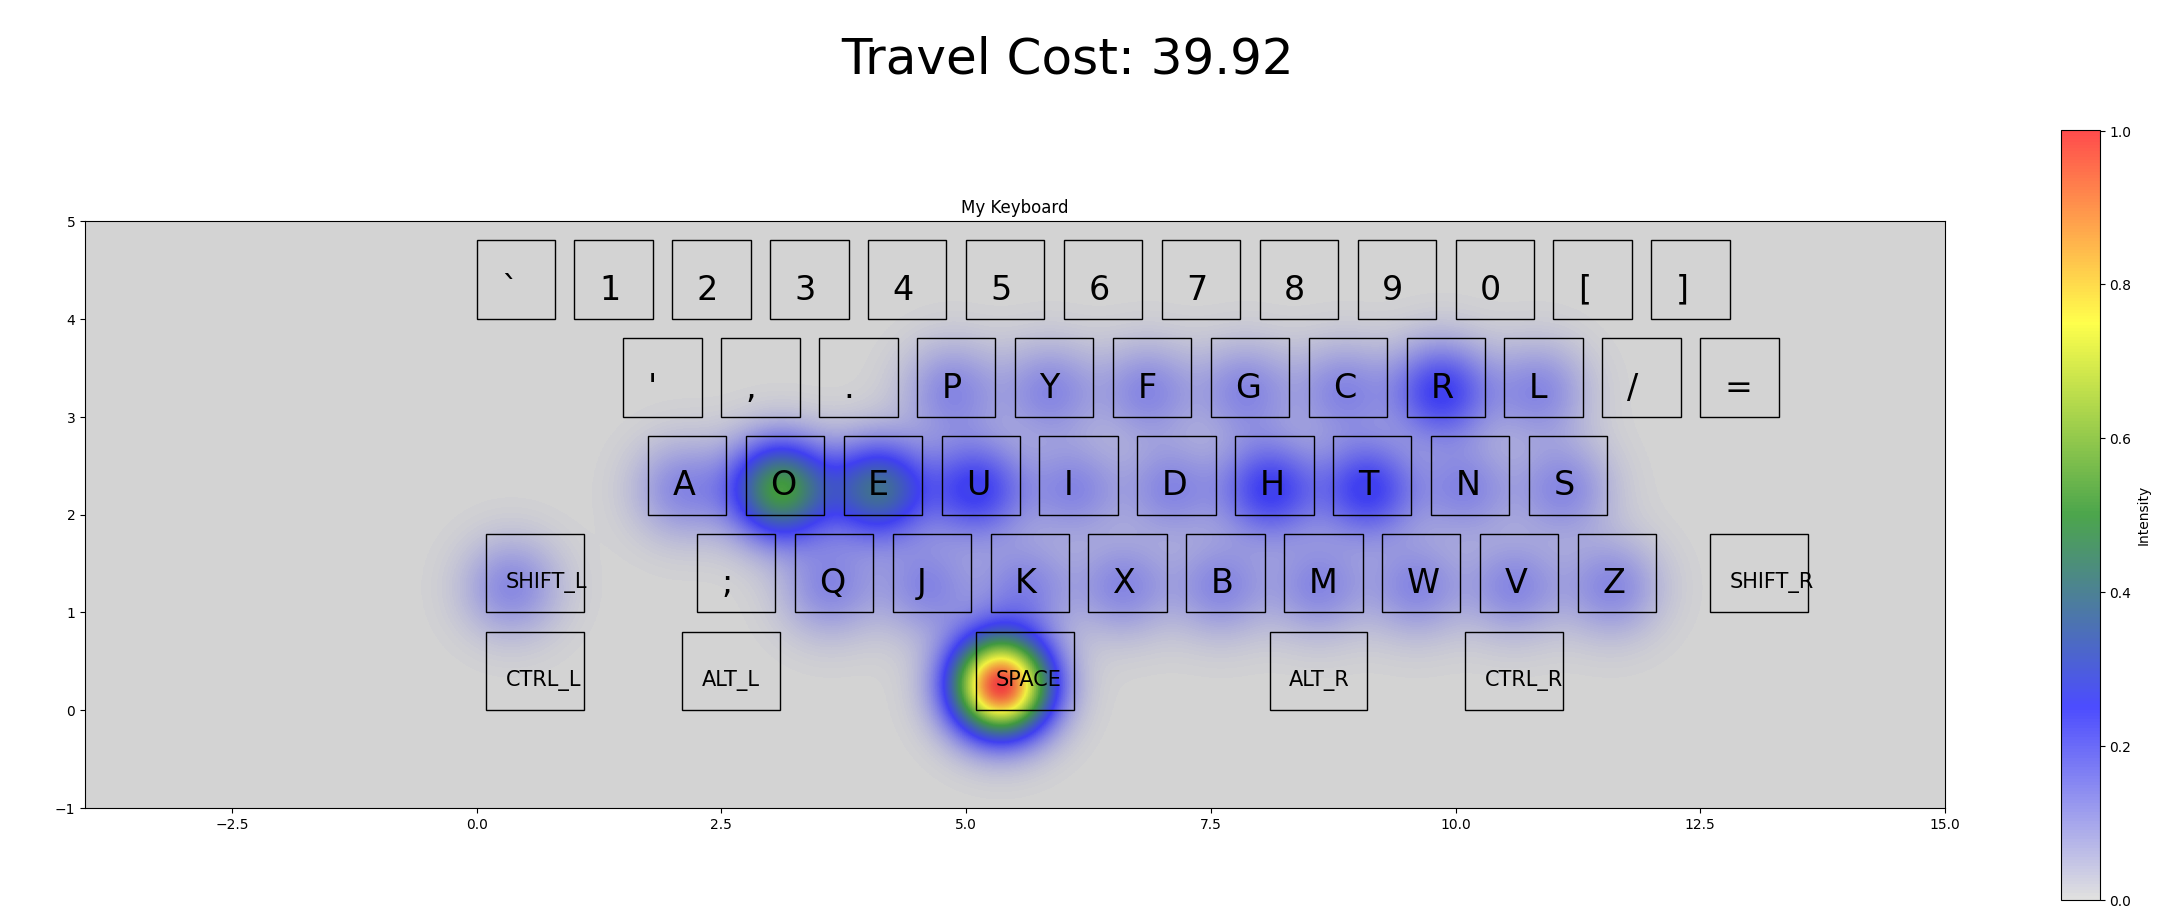

In [344]:
st="The quick brown fox jumps over the lazy dog"
import dvora_layout1 as qwel
display(st,qwel)